<a href="https://colab.research.google.com/github/knobs-dials/wetsuite-notebooks/blob/main/dataset_intro_by_doing__rechtspraaknl__(stats_example).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (only) in colab, run this first to install wetsuite from (the most recent) source.   For your own setup, see wetsuite's install guidelines.
!pip3 install -U --no-cache-dir --quiet https://github.com/knobs-dials/wetsuite-dev/archive/refs/heads/main.zip


# Purpose of this notebook



To show you around the dataset from the

In [1]:
import collections, pprint, datetime

import pandas
import matplotlib.pyplot
import matplotlib.dates as mdates

import wetsuite.datasets
import wetsuite.helpers.format

In [2]:
rs = wetsuite.datasets.load('rechtspraaknl-struc')
print( rs.description )
store = rs.data

None


## A little inspection

Not necessary for the dataset, but we'd like to know more about our data

In [3]:
# reminder to self of what's in there
store.random_choice()

('https://data.rechtspraak.nl/uitspraken/content?id=ECLI:NL:PHR:2010:BO1999',
 {'identifier': 'ECLI:NL:PHR:2010:BO1999',
  'issued': '2013-04-05',
  'publisher': 'Raad voor de Rechtspraak',
  'replaces': 'BO1999',
  'date': '2010-12-03',
  'type': 'Conclusie',
  'modified': '2021-07-19T14:44:07',
  'zaaknummer': '09/04361',
  'creator': 'Parket bij de Hoge Raad',
  'subject': 'Bestuursrecht; Belastingrecht',
  'inhoudsindicatie': '81 RO (conform conclusie A-G). Geen toepassing ruilarresten bij aanpassing van de beleggingsportefeuille van een pensioenfonds bij de overgang van opbouwfonds naar uitsluitend uitkeringsfonds.',
  'conclusie': '\nHR nr. 09/04361; \nHof nr. 08/00361; \nRechtbank nr. 07/2690\nDerde Kamer A\nVennootschapsbelasting 2005\n\nProcureur-Generaal bij de Hoge Raad der Nederlanden\n\nMR. P.J. WATTEL\nADVOCAAT-GENERAAL\n\nConclusie van 14 oktober 2010 inzake:\nSTICHTING X (V/H STICHTING A)\nTEGEN\nDE MINISTER VAN FINANCIËN\n\n1. Overzicht\n\n1.1. De belanghebbende, een s

In [4]:
# count how often these dates appear

issueds = collections.Counter()
dates   =  collections.Counter()
for key, value in store.items():
    dates.update( [value['date']] )
    issueds.update( [value['issued']] )

In [5]:
def ymd(s):
    " '2023-02-01' -> (2023, 2, 1) "
    y, m, d = s.split('-')
    return int(y,10), int(m,10), int(d,10)

y_count = collections.defaultdict(int)
y_m_count = collections.defaultdict(int)
# we have already counted data, but per day -- let's do it per month
for k,v in dates.items():
    yr, mo , _ = ymd(k)
    y_count['%s'%(yr)] += v
    y_m_count['%s_%s'%(yr,mo)] += v

# sorted( list(y_count.items()) )  

(726468.0, 738886.0)

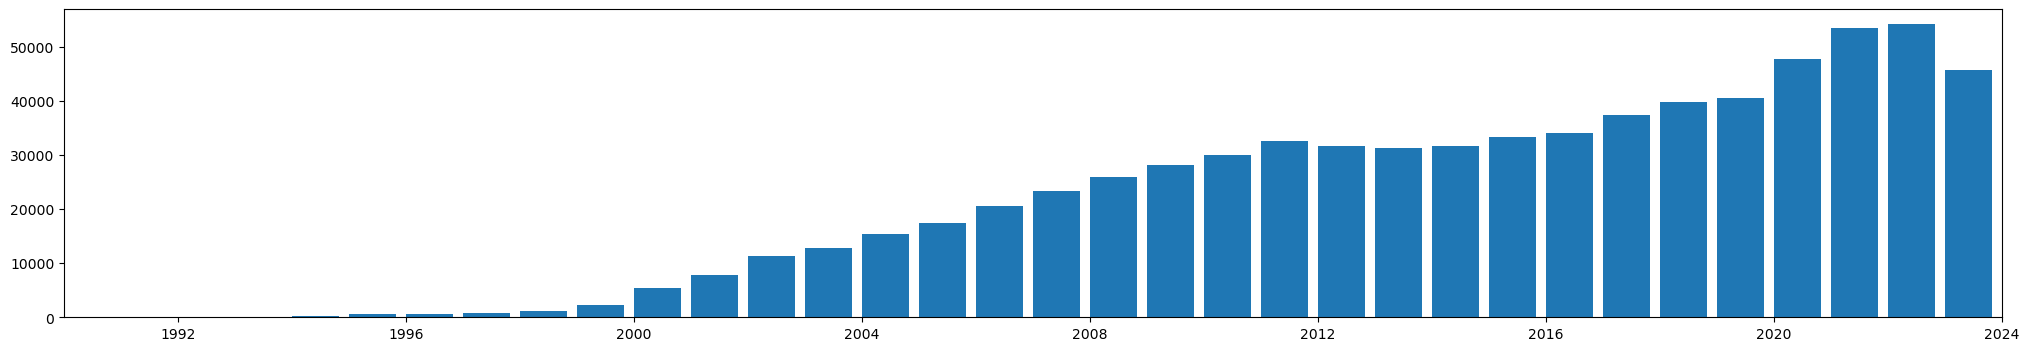

In [6]:
val, weight = [],[]
for y, count in sorted(y_count.items()):
    val.append( datetime.datetime(int(y),6,1) )
    weight.append( count )
#print( val, weight )

fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(25, 4))
ax.bar( val, weight, width=300 )
ax.set_xlim( [datetime.datetime(1990,1,1),datetime.datetime(2024,1,1)] )
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_rotation(90)  # possibly make that mybasesize-2 or such

(728294.0, 738886.0)

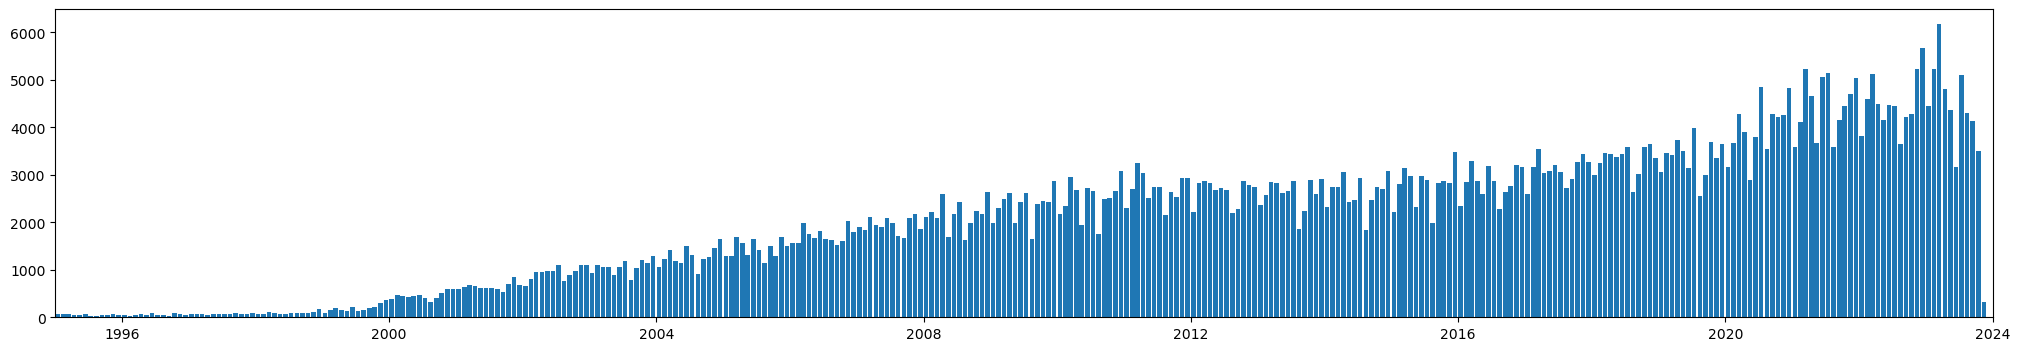

In [64]:
val, weight = [],[]
for y_m, count in y_m_count.items():
    y, m = y_m.split('_')
    val.append( datetime.datetime(int(y),int(m),14)  )
    weight.append( count )

fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(25, 4))
ax.bar( val, weight, width=25 )
ax.set_xlim( [datetime.datetime(1995,1,1),datetime.datetime(2024,1,1)] )

#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_rotation(90)  # possibly make that mybasesize-2 or such


#Actually, something like the following in pandas might have been nicer
#tt = df[ ['dt'] ].groupby( [df["dt"].dt.year,df["dt"].dt.month] ).count().plot(kind="bar", figsize=(22,3), title='Requests per month', stacked=True)


In [67]:
i=0

creators = collections.Counter()
subjects = collections.Counter()
spatials = collections.Counter()

for key, value in store.items():
    creators.update( [value['creator']] )

    if 'subject' in value:
        subjects.update( [value['subject']] )
    else:
        subjects.update( [None] )

    if 'spatial' in value:
        spatials.update( [value['spatial']] )
    else:
        spatials.update( [None] )

    #'creator', 'subject', 'spatial'

    #i += 1
    #if i>10000: 
    #    break
    #print( value )
    #print( value.keys() )


In [68]:
spatials

Counter({None: 347990,
         "'s-Gravenhage": 55719,
         'Den Haag': 26294,
         "'s-Hertogenbosch": 32233,
         'Rotterdam': 27945,
         'Onbekend': 11,
         'Sittard': 4,
         'Utrecht': 43739,
         'Amsterdam': 56140,
         'Arnhem': 25406,
         'Alkmaar': 6217,
         'Haarlemmermeer': 326,
         'Haarlem': 14366,
         'Leeuwarden': 15628,
         'Zwolle': 7214,
         'Nijmegen': 267,
         'Almelo': 4826,
         'Assen': 1959,
         'Harderwijk': 4,
         'Apeldoorn': 153,
         'Hoorn': 45,
         'Delft ': 2,
         'Zaanstad': 750,
         'Amersfoort': 628,
         'Zutphen': 3934,
         'Lelystad': 2656,
         'Leiden': 136,
         'Breda': 10819,
         'Helmond': 2,
         'Hilversum': 1,
         'Tiel': 2,
         'Roermond': 4971,
         'Bergen op Zoom': 430,
         'Middelburg': 8532,
         'Tilburg': 524,
         'Groningen': 7473,
         'Gouda': 141,
         'Maastricht'

In [69]:
subjects

Counter({'Bestuursrecht': 148960,
         'Bestuursrecht; Socialezekerheidsrecht': 56847,
         'Civiel recht': 150835,
         'Bestuursrecht; Ambtenarenrecht': 8899,
         'Civiel recht; Personen- en familierecht': 36843,
         'Bestuursrecht; Bestuursstrafrecht': 2061,
         'Bestuursrecht; Belastingrecht': 70140,
         'Bestuursrecht; Omgevingsrecht': 14318,
         'Bestuursrecht; Bestuursprocesrecht': 3087,
         'Internationaal publiekrecht': 384,
         'Bestuursrecht; Vreemdelingenrecht': 44929,
         'Strafrecht': 138842,
         'Civiel recht; Insolventierecht': 5191,
         'Civiel recht; Ondernemingsrecht': 2439,
         'Strafrecht; Strafprocesrecht': 1111,
         'Civiel recht; Internationaal privaatrecht': 396,
         'Strafrecht; Materieel strafrecht': 1653,
         'Civiel recht; Arbeidsrecht': 7512,
         'Civiel recht; Burgerlijk procesrecht': 3630,
         'Civiel recht; Verbintenissenrecht': 14535,
         'Strafrecht; Inter

In [70]:
creators

Counter({'College van Beroep voor het bedrijfsleven': 13545,
         'Centrale Grondkamer': 5,
         'Centrale Raad van Beroep': 81398,
         'Gerechtshof Amsterdam': 37830,
         'Gerechtshof Arnhem-Leeuwarden': 27930,
         'Gerechtshof Arnhem': 9147,
         'Gerechtshof Den Haag': 13536,
         'Gerechtshof Leeuwarden': 7865,
         "Gerechtshof 's-Gravenhage": 10118,
         "Gerechtshof 's-Hertogenbosch": 30216,
         'Hoge Raad': 44106,
         'Kantongerecht Almelo': 3,
         'Kantongerecht Amersfoort': 3,
         'Kantongerecht Amsterdam': 2,
         'Kantongerecht Beetsterzwaag': 1,
         'Kantongerecht Bergen op Zoom': 6,
         'Kantongerecht Emmen': 4,
         'Kantongerecht Haarlem': 8,
         'Kantongerecht Harderwijk': 3,
         'Kantongerecht Heerlen': 3,
         'Kantongerecht Hoorn': 1,
         'Kantongerecht Heerenveen': 4,
         'Kantongerecht Leeuwarden': 7,
         'Kantongerecht Lelystad': 2,
         'Kantongerecht Ma

In [7]:
import pandas
pandas.DataFrame( data   for key, data in store.random_sample(10000) )

,identifier,issued,publisher,date,type,modified,zaaknummer,creator,subject,spatial,inhoudsindicatie,uitspraak,replaces,conclusie
0,ECLI:NL:RBROT:2023:2623,2023-03-28,Raad voor de Rechtspraak,2023-03-22,Uitspraak,2023-04-11T11:23:49,C/10/491720 / HA ZA 15-1296,Rechtbank Rotterdam,Civiel recht; Verbintenissenrecht,Rotterdam,letselschadezaak; immateriele schade; toekomst...,"\n\n1\n[eiseres01] ,\n\nwonende te [woonplaats...",NaN,NaN
1,ECLI:NL:OGHACMB:2017:6,2017-04-10,Raad voor de Rechtspraak,2017-02-14,Uitspraak,2017-04-10T11:29:18,AR 2519/14 Ghis 79160 H - 138/2016,"Gemeenschappelijk Hof van Justitie van Aruba, ...",Civiel recht,NaN,Tussentijdse opzegging verzekeringen,\n\n1\nHet verloop van de procedure\n\n1.1.\nV...,NaN,NaN
2,ECLI:NL:RBMAA:2012:3969,2021-05-20,Raad voor de Rechtspraak,2012-01-27,Uitspraak,2021-05-20T14:28:22,167719 / KG ZA 11-551,Rechtbank Maastricht,Civiel recht,Maastricht,kort geding; tekortschieten nakoming,\n\n1\nDe procedure\n\n1.1.\nHet verloop van d...,NaN,NaN
3,ECLI:NL:RBARN:2012:BX6157,2013-04-05,Raad voor de Rechtspraak,2012-08-01,Uitspraak,2015-11-11T09:53:39,199660,Rechtbank Arnhem,Civiel recht,NaN,Eis.conv./verw.reconv. is geslaagd in de bewij...,\nVonnis\nRECHTBANK ARNHEM\n\nSector civiel re...,BX6157,NaN
4,ECLI:NL:RBNHO:2022:3424,2022-04-20,Raad voor de Rechtspraak,2022-02-15,Uitspraak,2022-04-20T12:33:14,9629459 \ WM VERZ 22-6,Rechtbank Noord-Holland,Bestuursrecht; Bestuursstrafrecht,Zaanstad,WAHV een voertuig parkeren op een plaats beste...,\nHet verloop van de procedure\n\nAan betrokke...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ECLI:NL:GHSGR:2005:AU9569,2013-04-04,Raad voor de Rechtspraak,2005-12-20,Uitspraak,2022-07-08T17:02:10,BK--3/03734,Gerechtshof 's-Gravenhage,Bestuursrecht; Belastingrecht,NaN,"Vrijstelling art. 37, lid 2, b, Wbr terecht ge...",\nGERECHTSHOF TE 's-GRAVENHAGE\neerste meervou...,AU9569,NaN
9996,ECLI:NL:RBNHO:2020:2673,2020-04-08,Raad voor de Rechtspraak,2020-04-09,Uitspraak,2020-08-06T13:37:44,AWB - 18 _ 3313,Rechtbank Noord-Holland,Bestuursrecht; Belastingrecht,Alkmaar,"WOZ, ten onrechte geen rekening gehouden met w...",\nProcesverloop\n\nVerweerder heeft bij beschi...,NaN,NaN
9997,ECLI:NL:RBGEL:2021:6592,2021-12-09,Raad voor de Rechtspraak,2021-12-03,Uitspraak,2021-12-09T18:15:22,C/05/391492 / FZ RK 21-2123,Rechtbank Gelderland,Civiel recht; Personen- en familierecht,Zutphen,Wijziging geboorteakte naar ‘het geslacht niet...,\nHet verloop van de procedure\nHet procesverl...,NaN,NaN
9998,ECLI:NL:CRVB:2005:AU2768,2013-04-04,Raad voor de Rechtspraak,2005-09-09,Uitspraak,2013-04-04T22:40:15,03/1523 WAO,Centrale Raad van Beroep,Bestuursrecht; Socialezekerheidsrecht,NaN,Is terecht WAO-uitkering geweigerd? Is betrokk...,03/1523 WAO\n\nU I T S P R A A K\n\nin het ged...,AU2768,NaN


In [13]:
pandas.DataFrame( store.values() )

: 